In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\sree0\Downloads\train(1).csv")


In [2]:
# Loading  the dataset
data = pd.read_csv(r"C:\Users\sree0\Downloads\train(1).csv")

In [3]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176.0,77.0,58,47,...,Right,7.7,NaN,8.1,2,High,Talent Hunt,8.0,0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148.0,54.0,69,70,...,Any,5.3,0.0,NaN,3,Medium,Source,3.0,0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172.0,34.0,43,45,...,Left,4.7,0.0,6.6,5,Low,Academy,2.0,0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165.0,79.0,73,76,...,Right,8.6,113.0,8.6,6,Medium,Academy,13.0,16,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158.0,47.0,61,74,...,Right,NaN,0.0,5.7,5,Medium,Academy,4.0,0,0


## Exploratory Data Analysis(EDA)

In [4]:
# Display basic info about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  float64
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  int64  
 9   body_balance               13994 non-null  int64  
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  int

In [5]:
# Summary statistics
print(data.describe())


                age        weight  ball_controlling_skills  body_reflexes  \
count  13994.000000  13577.000000             13581.000000   13994.000000   
mean      21.135844    165.621492                56.043958      61.934329   
std        5.162719     15.449959                16.787353      14.931963   
min       16.000000    110.000000                 5.000000      12.000000   
25%       17.000000    154.000000                51.000000      54.000000   
50%       20.000000    165.000000                61.000000      64.000000   
75%       24.000000    176.000000                67.000000      72.000000   
max       61.000000    243.000000                95.000000      96.000000   

       body_balance  jumping_skills  penalties_conversion_rate  \
count  13994.000000    13970.000000               13964.000000   
mean      62.753323       63.612026                  48.495703   
std       14.203638       11.938712                  15.767506   
min        9.000000       14.000000       

In [6]:
# Missing value analysis
print(data.isnull().sum())

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [7]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [8]:
# Impute missing numerical values with mean
numerical_cols = ['age', 'height', 'weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate','mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won','years_of_experience', 'no_of_disqualifications',
       ]   
# List all numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing categorical values with mode
categorical_cols = ['gender', 'country','strong_foot', 'dedication_level',
       'coaching'] 
# List all categorical columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


C:\Users\sree0\AppData\Local\Temp\ipykernel_17192\3994673063.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


In [9]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [11]:
data['weight'] = data['weight'].fillna(data['weight'].mean())


C:\Users\sree0\AppData\Local\Temp\ipykernel_17192\73388466.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


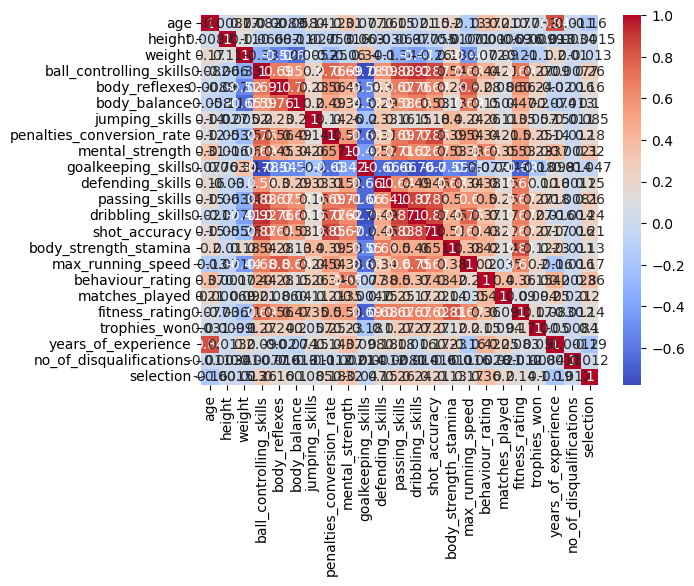

<Figure size 8000x2000 with 0 Axes>

In [31]:
# Correlation heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(80, 20)) 
plt.show()


## Data Pre-processing

In [17]:
# Encode categorical variables (example: using one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['gender', 'country', 'strong_foot', 'dedication_level',
       'coaching'])


In [19]:
# Convert height from inches to centimeters
data['height'] = data['height'] * 2.54

# Now the 'height' column contains heights in centimeters.


In [21]:
data['height']

0        187.96
1        177.80
2        187.96
3        180.34
4        172.72
          ...  
13989    182.88
13990    177.80
13991    182.88
13992    177.80
13993    172.72
Name: height, Length: 13994, dtype: float64

In [22]:
# Normalize/Scale numerical features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'height', 'weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate','mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won','years_of_experience', 'no_of_disqualifications' ]  # List all numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])


## Splitting data and Model selection

In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop(['player_id', 'name', 'selection'], axis=1)
y = data_encoded['selection']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Moel Building and Fine Tuning

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the model
model = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.851004912907548


In [26]:
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8520900321543409
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1286
           1       0.85      0.88      0.87      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799

Confusion Matrix:
 [[1046  240]
 [ 174 1339]]
